In [ ]:
#Visualizaciones de los indicadores de las cabezas de ganado y propuestas de particion en clases significativas

#Visualizacion de los indicadores de las cabezas de ganado y propuestas de particion en clases significativas


### Instalamos dfply

In [1]:
#pip install dfply

### Cargamos librerias

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import dfply
import requests
from scipy import stats
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

UsageError: Line magic function `%` not found.


## Leemos el archivo de los datos (lo limpié desde origen) removiendo los datos que nos servirán de control (alimento, medicamento, etc)

In [ ]:
data = pd.read_csv('Animales.csv', encoding='iso8859_2')

### Visualizamos nuestro dataset a ver que nos muestra

In [ ]:
data.head()

,sinniga,kg_entrada,aum_diario,calificacion,dias_rancho,productor,costo_kg,tipo
0,2653730918,226,1.06,2,104,FCO JAVIER LEON NAVARRO,52.26,BCO
1,2654184611,297,1.83,2,79,IGNACIO TRUJILLO,36.00,VACA
2,2654202460,254,1.02,3,87,EL RETIRO,44.93,VAC
3,2654202501,236,1.04,2,87,EL RETIRO,45.98,VAC
4,2654261774,255,1.46,2,78,EL RETIRO,42.24,VAC


### Y sacamos algunas estadísticas

In [ ]:
data.shape
data.describe()

,sinniga,kg_entrada,aum_diario,calificacion,dias_rancho,costo_kg
count,1.150000e+03,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,2.655655e+09,202.397391,0.965174,1.706087,146.657391,43.195374
std,2.911524e+05,39.708702,0.401182,0.678308,65.165659,4.736587
min,2.653731e+09,102.000000,-0.820000,1.000000,12.000000,26.960000
25%,2.655487e+09,176.250000,0.700000,1.000000,94.000000,40.187500
50%,2.655681e+09,198.000000,0.920000,2.000000,132.000000,42.835000
75%,2.655799e+09,226.000000,1.270000,2.000000,204.000000,45.762500
max,2.656263e+09,348.000000,2.300000,3.000000,306.000000,66.700000


In [ ]:
data.isna().sum()

sinniga         0
kg_entrada      0
aum_diario      0
calificacion    0
dias_rancho     0
productor       0
costo_kg        0
tipo            0
dtype: int64

### Aqui revisaremos las clasificaciones que tenemos, para buscar nuestra Y

In [ ]:
data['productor'].unique()

array(['FCO JAVIER LEON NAVARRO', 'IGNACIO TRUJILLO', 'EL RETIRO',
       'JAIME VAZQUEZ', 'PARALELO 30', 'FCO ALFREDO ANDRADE SESMA',
       'EPIFANIO VALDEZ', 'JOSE MANUEL VALDEZ',
       'JESUS ROBERTO CARRANZA V', 'HUGO PLACECIA GAMES',
       'FCO JAVIER LEON GUTIERREZ', 'CLAUDIO VALDES VARELA',
       'RAUL LEON AMPARANO', 'BERNARDINA VALDEZ FONTES',
       'JOSE ANGEL GUDIĂ\x91O GOMES', 'MARTIN EDUARDO PADILLA JIMENEZ',
       'JESUS ALBERTO CANO VELEZ'], dtype=object)

In [ ]:
data['calificacion'].unique()


array([2, 3, 1])

## La clasificación que no tiene pierde es la del tipo de animal, no depende del ojo de quien la trabaja

In [ ]:
#data['tipo'].unique()
#Lo guardare en una lista, lo necesitaré mas tardeñt
ltipo= [[]]
ltipo = data['tipo'].unique().tolist()
ltipo

['BCO', 'VACA', 'VAC', 'BCA', 'VLLA', 'NOV', 'TORE']

### Visualizamos un boxplot por aquello de los outliers...

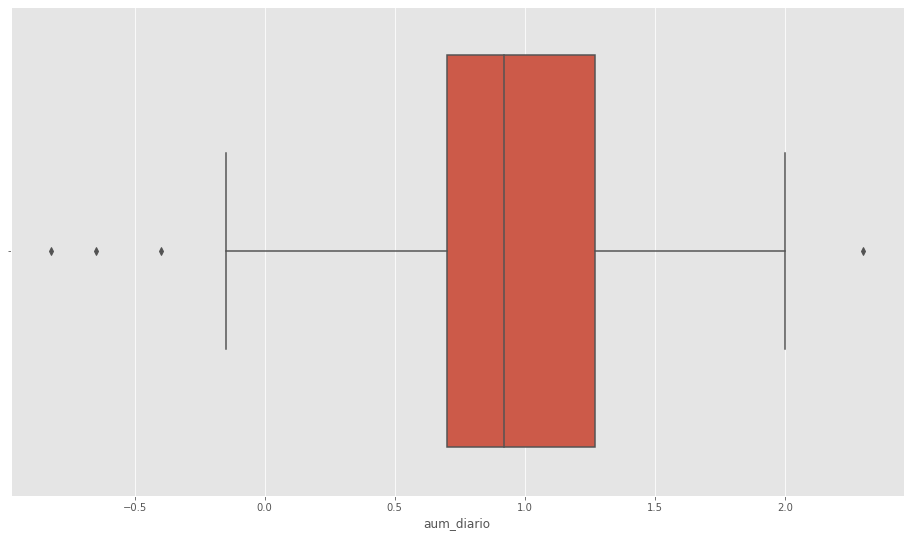

In [ ]:
sns.boxplot(x=data.aum_diario)

### vamos a ver cuantos hay de cada clasificacion que tenemos

In [ ]:
print("Agrupado por :",data.groupby('tipo').size(),"\n\n")
print("Agrupado por :",data.groupby('calificacion').size())

Agrupado por : tipo
BCA     334
BCO     612
NOV      49
TORE      5
VAC     104
VACA      4
VLLA     42
dtype: int64 


Agrupado por : calificacion
1    483
2    522
3    145
dtype: int64


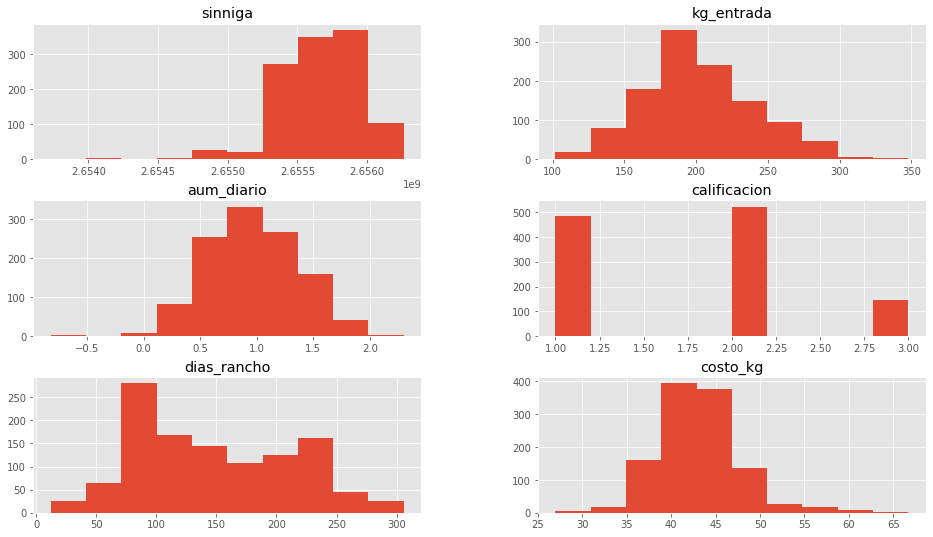

In [ ]:
data.hist()
plt.show()

### Voy a usar tres valores para no usar todos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


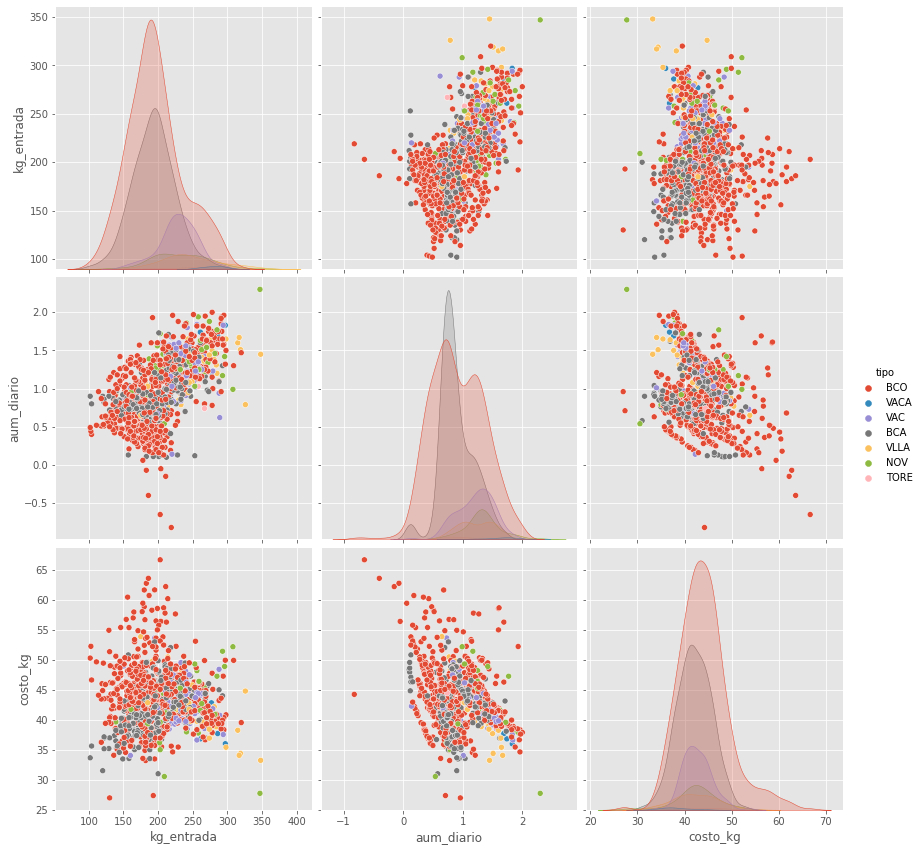

In [ ]:
sns.pairplot(data, hue = 'tipo', size=4, vars=['kg_entrada','aum_diario', 'costo_kg'], kind= 'scatter')

### Voy a hacer mi X con las mismas características

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = np.array(data[['kg_entrada','aum_diario', 'costo_kg']])
XScaled = scaler.fit_transform(X)
X = XScaled
y = np.array(data['tipo'])
X.shape

(1150, 3)

In [ ]:
X

array([[0.50406504, 0.6025641 , 0.63663815],
       [0.79268293, 0.84935897, 0.22747861],
       [0.61788618, 0.58974359, 0.45218923],
       ...,
       [0.74390244, 0.83012821, 0.51107197],
       [0.79268293, 0.68589744, 0.57825868],
       [0.5203252 , 0.77564103, 0.32385506]])

In [ ]:
ltipo

['BCO', 'VACA', 'VAC', 'BCA', 'VLLA', 'NOV', 'TORE']

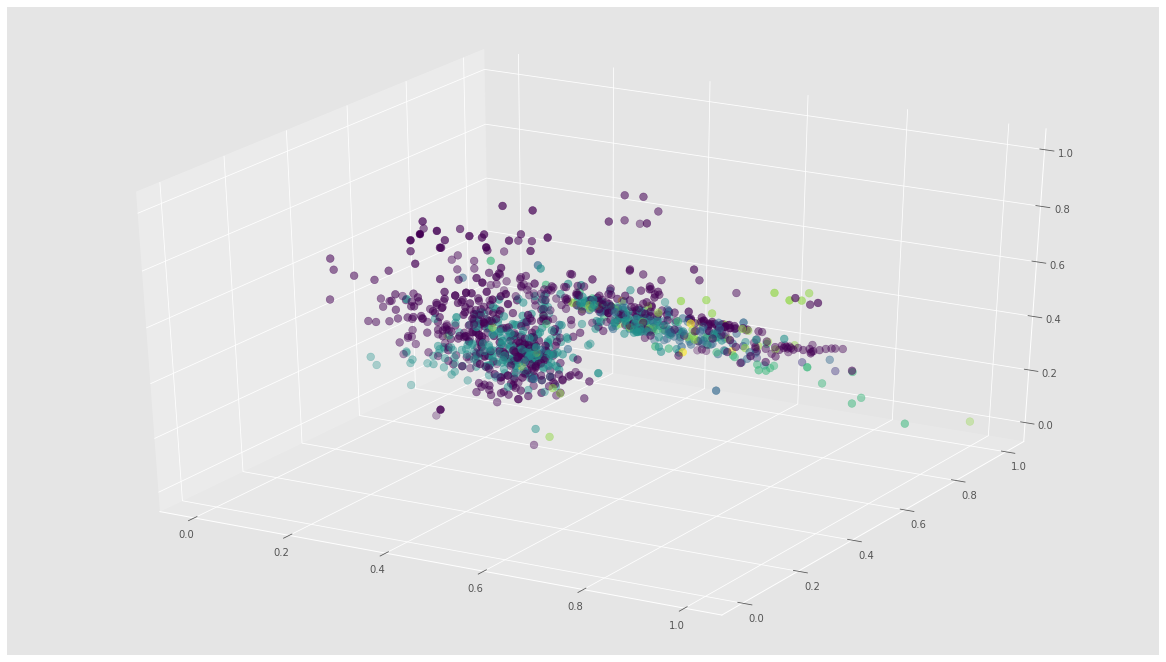

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange']
#colores=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
asignar=[]
for row in y:
    asignar.append(ltipo.index(row))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

## Voy a buscar mi K por el método del codo

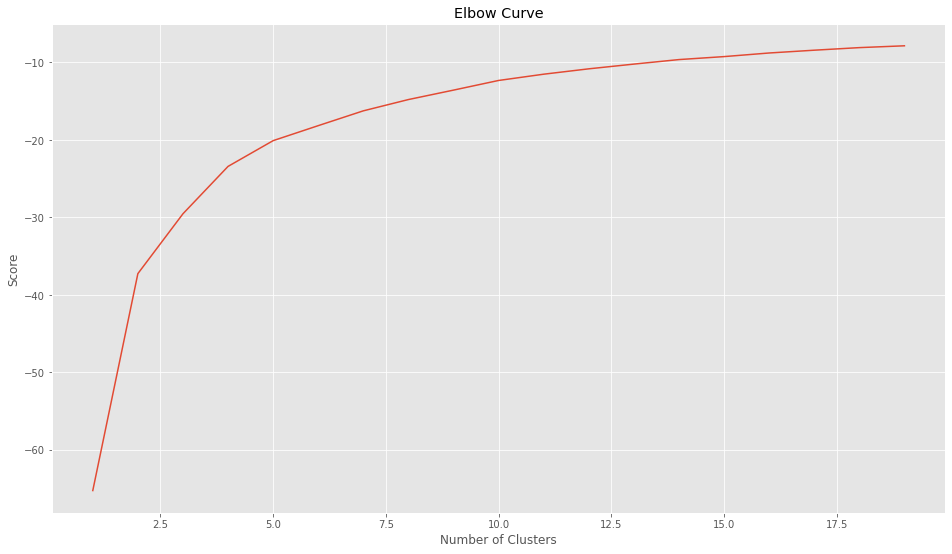

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Lo voya dejar en 5 a ver que tal

# Ejecutamos K-Means para 5

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.20916156 0.53627301 0.36195735]
 [0.46262993 0.64372363 0.46202771]
 [0.65273218 0.7310466  0.36076444]
 [0.30419421 0.38964774 0.61763143]
 [0.36763559 0.47635669 0.34428149]]


## Graficamos

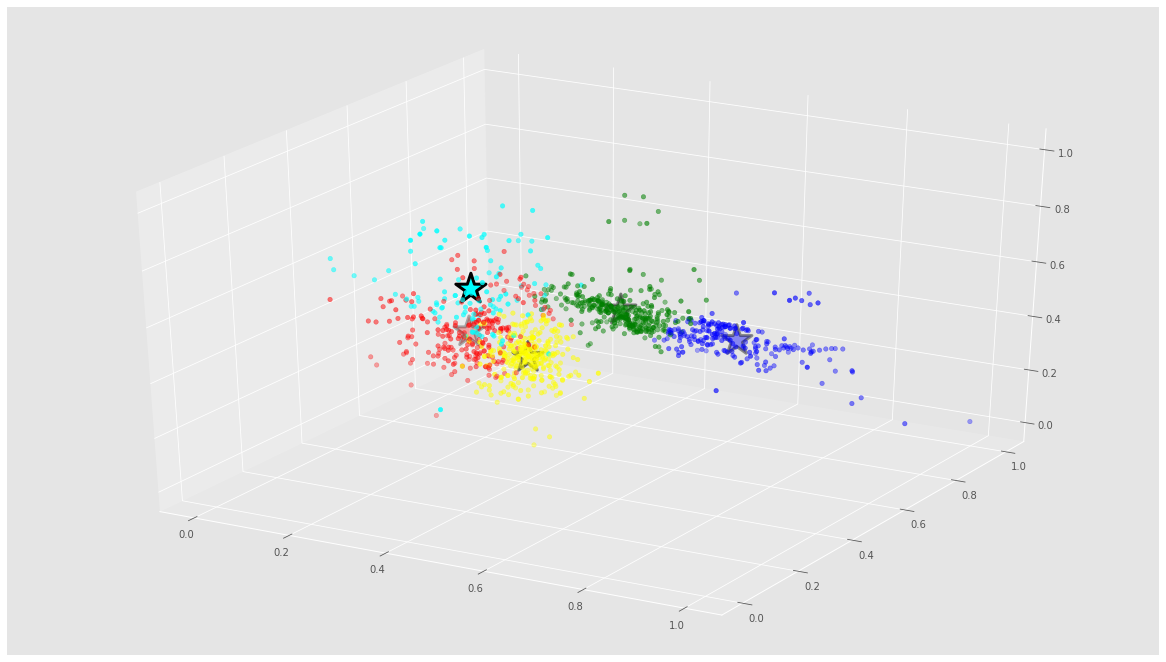

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', edgecolor='black', linewidth=3, c=colores, s=1000)

## Vamos a hacer graficas en 2D con las demás

In [ ]:
XScaled = pd.DataFrame(XScaled)
XScaled

,0,1,2
0,0.504065,0.602564,0.636638
1,0.792683,0.849359,0.227479
2,0.617886,0.589744,0.452189
3,0.544715,0.596154,0.478611
4,0.621951,0.730769,0.384499
...,...,...,...
1145,0.483740,0.891026,0.193005
1146,0.516260,0.865385,0.213639
1147,0.743902,0.830128,0.511072
1148,0.792683,0.685897,0.578259


In [ ]:
#'kg_entrada','aum_diario', 'costo_kg'
# Getting the values and plotting it
data['kg_entrada'] = XScaled[0]
data['aum_diario'] = XScaled[1]
data['costo_kg'] = XScaled[2]


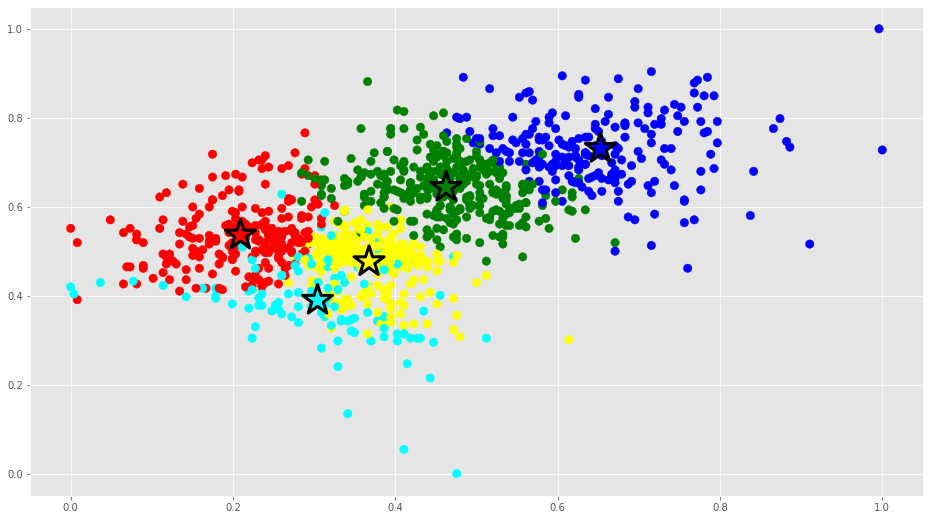

In [ ]:
f1 = data['kg_entrada'].values
f2 = data['aum_diario'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', edgecolor='black', linewidth=3, c=colores, s=1000)
plt.show()

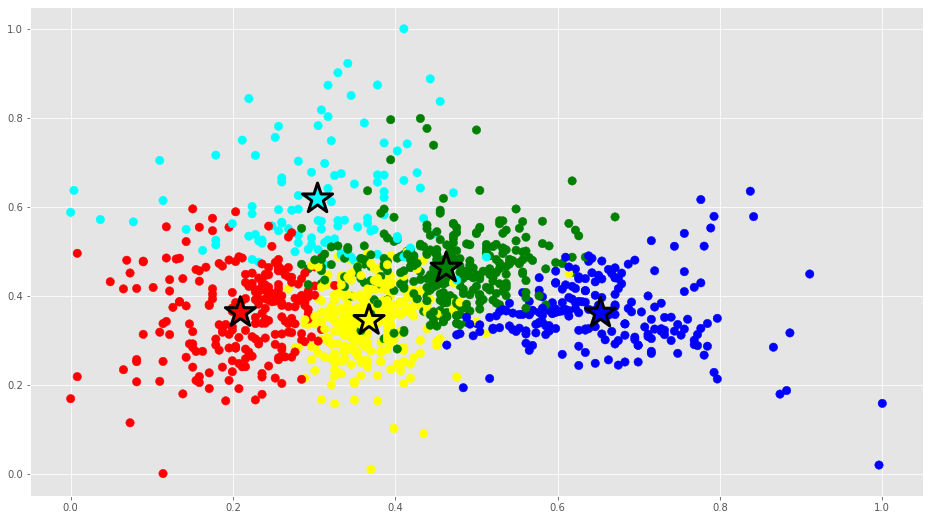

In [ ]:
f1 = data['kg_entrada'].values
f2 = data['costo_kg'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores,  edgecolor='black', linewidth=3, s=1000)
plt.show()

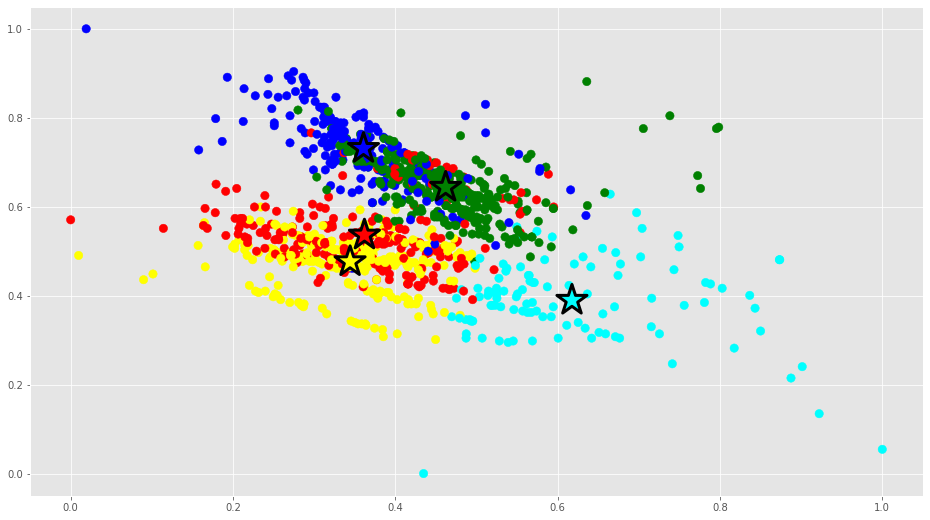

In [ ]:
f1 = data['costo_kg'].values
f2 = data['aum_diario'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 1], marker='*', c=colores, edgecolor='black', linewidth=3, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['tipo']=data['tipo'].values
copy['calificacion']=data['calificacion'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,292
1,green,316
2,blue,107
3,cyan,227
4,yellow,208


In [ ]:
data.groupby('calificacion').size()

calificacion
1    483
2    522
3    145
dtype: int64

In [ ]:
group_ref_tip = group_referrals.groupby('tipo')['calificacion'].count()
print(group_ref_tip)
group_referrals.groupby('tipo').size()

NameError: ignored

In [ ]:
#Los rojos tienen una mejor relacion en cuanto al costo de entrada, los kg y el aumento
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['tipo']=['BCO', 'VACA', 'VAC', 'BCA', 'VLLA', 'NOV', 'TORE']
diversidadGrupo['cantidad']=group_referrals.groupby('tipo').size()
diversidadGrupo


,tipo,cantidad
0,BCO,NaN
1,VACA,NaN
2,VAC,NaN
3,BCA,NaN
4,VLLA,NaN
5,NOV,NaN
6,TORE,NaN


In [ ]:
#vemos el representante del grupo, el individo cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([178,  78, 378, 272,   5])

In [ ]:
animals=data['sinniga'].values
for row in closest:
    print(animals[row])

2655421063
2655338709
2655560015
2655486342
2654402295


In [ ]:
data

,sinniga,kg_entrada,aum_diario,calificacion,dias_rancho,productor,costo_kg,tipo
0,2653730918,0.504065,0.602564,2,104,FCO JAVIER LEON NAVARRO,0.636638,BCO
1,2654184611,0.792683,0.849359,2,79,IGNACIO TRUJILLO,0.227479,VACA
2,2654202460,0.617886,0.589744,3,87,EL RETIRO,0.452189,VAC
3,2654202501,0.544715,0.596154,2,87,EL RETIRO,0.478611,VAC
4,2654261774,0.621951,0.730769,2,78,EL RETIRO,0.384499,VAC
...,...,...,...,...,...,...,...,...
1145,2656223618,0.483740,0.891026,2,147,EL RETIRO,0.193005,BCO
1146,2656223619,0.516260,0.865385,2,148,EL RETIRO,0.213639,BCO
1147,2656225059,0.743902,0.830128,2,60,EPIFANIO VALDEZ,0.511072,NOV
1148,2656225194,0.792683,0.685897,1,61,EPIFANIO VALDEZ,0.578259,BCO


In [ ]:
data_with_labels = data

In [ ]:
data_with_labels['labels'].astype("category").cat.codes.values


KeyError: ignored

In [ ]:
data_with_labels['labels'] = labels
bar_colors = data_with_labels['labels'].astype("category").cat.codes.values


In [ ]:
#data_with_labels.groupby(['labels', 'productor','tipo']).agg({'tipo':'count'}).to_csv('resultado.csv')
data_grouped = (data_with_labels.groupby(['labels', 'productor','tipo']).agg({'tipo':'count'}))

In [ ]:
data_grouped

tipo
labels productor                tipo      
0      BERNARDINA VALDEZ FONTES BCA      3
                                BCO      1
       EL RETIRO                BCA    112
                                BCO    152
                                NOV      4
...                                    ...
4      JESUS ROBERTO CARRANZA V BCO      1
                                VAC      3
       JOSE MANUEL VALDEZ       VLLA     1
       PARALELO 30              BCO      4
                                VAC      2

[85 rows x 1 columns]

In [ ]:
data_grouped.to_csv('resultado.csv')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


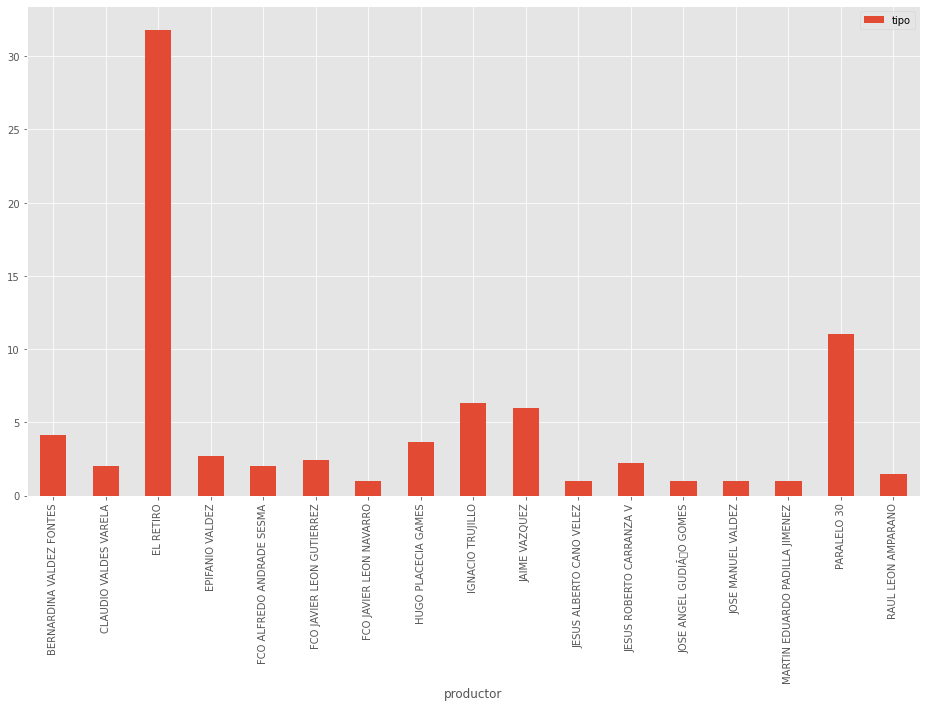

In [ ]:
pd.pivot_table(data_grouped, index = 'productor').plot(kind = 'bar', rot = 0)
plt.xticks(rotation=90)
plt.show()